In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Now we import our dataset Titanic Survived

In [2]:
titanic=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [5]:
titanic["PassengerId"].duplicated().sum()

0

In [6]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 As we can check that "Age" , "Cabin", And "Embarked" have some null values especially the " cabin" section and " age " section
 

In [9]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As you can see that total survived passengers are 342 and loss passengers are 542

In [10]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

So there are 577 male and 314 female but let;s check how many female passengers amd male passengers survived

In [11]:
female_surv=titanic[(titanic["Sex"]=="female") & (titanic["Survived"]==1)]
male_sur= titanic[(titanic["Sex"]=="male") & (titanic["Survived"]==1)]

In [12]:
print(" total female passengers survived are:- ", len(female_surv))
print(" total female passengers survived are:- " ,len(male_sur))

 total female passengers survived are:-  233
 total female passengers survived are:-  109


In [13]:
percent_female_surv=(len(female_surv)/314)*100
percent_female_surv

74.20382165605095

1. As you can see out of 342 passengers female survivor was more and male surviior was less ( " so male passengers not survived than fenmale)

2.  As you can see that Out of 314 almost 233 female passenger had survived IT MEANS 74% FEMALE SURVIVED AND REMANING DIDN'T 

In [14]:
class_surv=pd.crosstab(titanic["Survived"],titanic["Pclass"])
class_surv

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


As tou can see  from above table that "first class people" have more survival rate then "3rd class" people and "3rd class people have more no of not survived poeple than any other class

In [15]:
grouped_data = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(grouped_data)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [16]:
group_table = titanic.groupby(['Pclass','Survived'])['Age', 'Fare'].mean()
print(group_table)

                       Age       Fare
Pclass Survived                      
1      0         43.695312  64.684007
       1         35.368197  95.608029
2      0         33.544444  19.412328
       1         25.901566  22.055700
3      0         26.555556  13.669364
       1         20.646118  13.694887


As we can clealry say that in the first class AHving more fare and Age of 35 years have more Survived thn any other class obviosly old people have less survival rate samer as in second class Fare is age 25  having more survival 

Generally we in every class the younger people have more chance to survive tha any other class , and also in third class we can see that therre are more number of younger people than any other class

In [17]:
class_sex=pd.crosstab(titanic["Sex"],titanic["Pclass"])
class_sex

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [18]:
sibsp_surv=pd.crosstab(titanic["Survived"],titanic["SibSp"])
sibsp_surv

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


1. It is very interesting thing to see that the passengers who have no siblings or parents having higher rate of "not survived"

2. the person who having one sibling have survived int his But generally passengers who having siblings or parents are having nmot good data

In [19]:
embark_surv=pd.crosstab(titanic["Survived"],titanic["Embarked"])
embark_surv

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


As we can clearly see that passengers who have borad from "Chernbough" have more survival than any other city like queensland and southampton have very less survival rate and the passengers from southampton also have more boarding than any other city 

In [20]:
class_age=pd.crosstab(titanic["Pclass"],titanic["Embarked"])
class_age

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


As we can clearly see that passengers from first class board maximum from southhampton >chernbough> Queensland  

In [21]:
# as we know the cabin column data dosen't contribute to our dataset so we will drop the cabin column

titanic=titanic.drop(columns=['Cabin'],axis=1)


In [22]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [23]:
# let's find the missing values in the age and Embarked column our data have only 177 missing values present 
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [24]:
#

In [25]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [26]:
#lets's check null values for Age column
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As you can see we removed the null values from the dataset

In [27]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data visualization

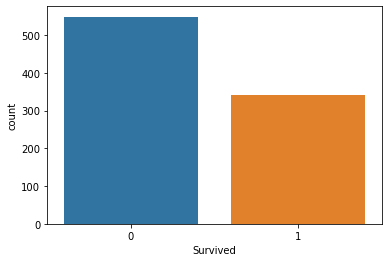

In [28]:
# let's understand the dataset through graph and plot 
sns.countplot(x='Survived', data=titanic)
plt.show()

As you can see that no of passengers who survived is very less as compared because we know that inicident  due to drwaning and cold water had less chanvce to survive 

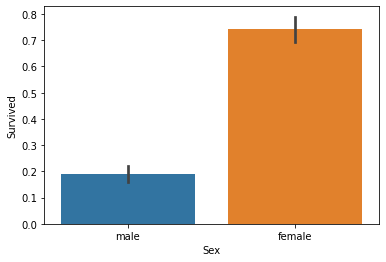

In [29]:
# let's see how many male and female survive 
sns.barplot(x="Sex",y="Survived",data=titanic)
plt.show()

from this graph we get insight that percentage of feamle passenger survival rate is high almost 75% as compared to men because we know during that incident large priority was given to save the "women and children" so percentage of female is high

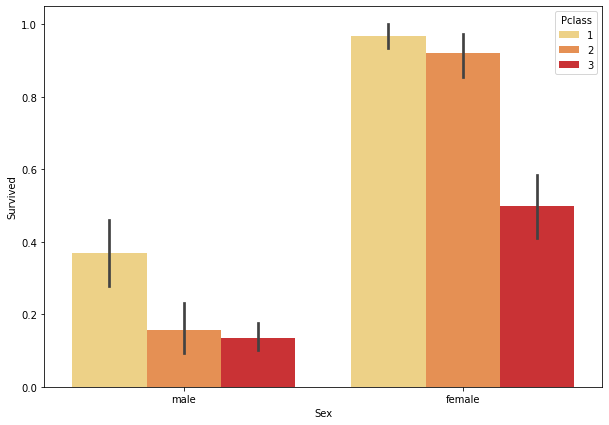

In [30]:
# let's see which class have survival rate ( this grapg gives very good insight information)
plt.figure(figsize=(10,7))
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=titanic,palette="YlOrRd")
plt.show()

This graph gives very good information about the dataset
1. In the male section you can see the male who belong to the " first class"  very high chance of survival rate almost 40% then follow by " second class and third class ". and we know that during that incident proirity was given to the class who have paid higher Fare

2. In the female section we cannclearly see that female percentage of survival in all the class comapritively higher than men;s all class due to women was given priority yeah but the third class women Survival rate is very low due to Fare and priority 
but in woemn almost 90% women survived from First class because 
they get benefit of being women and second they paid higher Fare price same as for second class

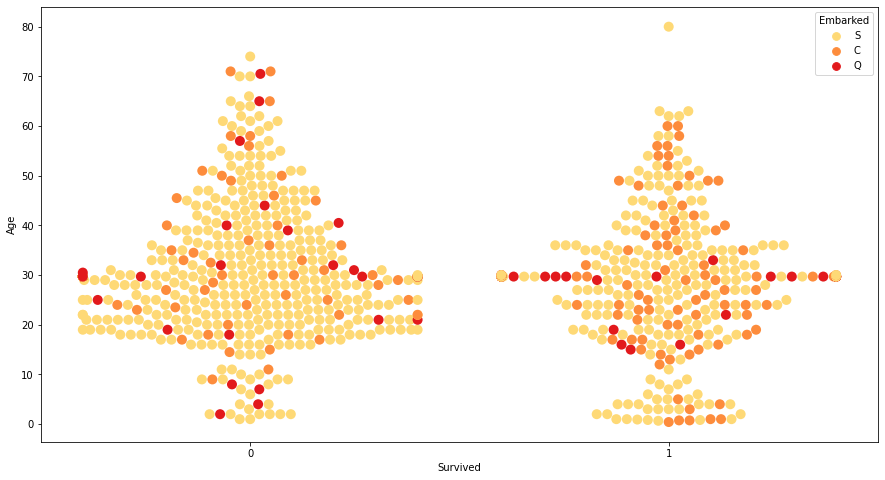

In [31]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Survived",y="Age",hue="Embarked",data=titanic,palette="YlOrRd",s=10)
plt.show()

From this graph insight also we get very useful information
1. we can clealry see that Southhampton city passengers are more boarding for titanic rather than queensland and chernbough city
2. In the plot we can see the passenger whob didn't survive are younger population between age " 18 to 32" these are obvisouly trying to save pther people on the ship as directed because they cxan save littile children and women 
3. same as passengers who have surbvived are less compared to who not survived but the in survival also manhy young passengersbut number are very less

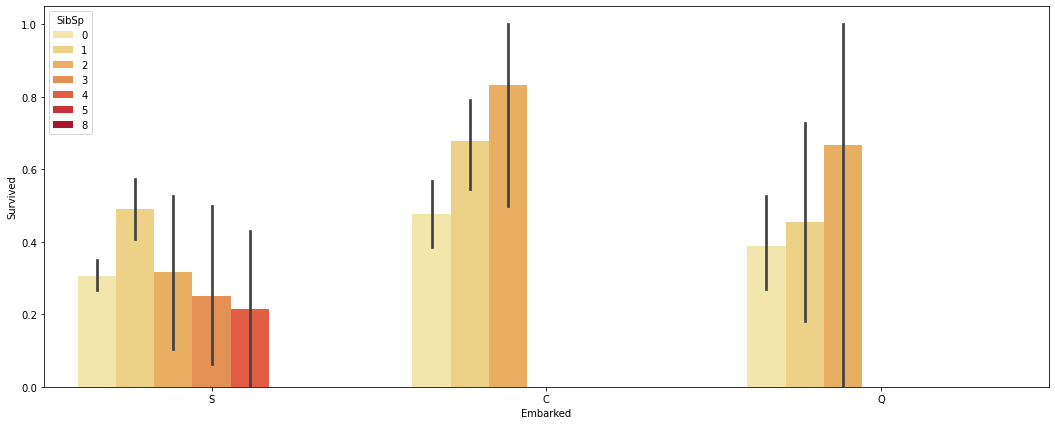

In [32]:
plt.figure(figsize=(18,7))
sns.barplot(x="Embarked",y="Survived",hue="SibSp",data=titanic,palette="YlOrRd")
plt.show()

1. In southhampton city we can see that passengers who having 1 siblings have more survival rate ( and also southhampton city passengers have more number of siblings or parents with them upto 4) 
2. In Chernbough people who having 2 siblings have more survival then other who hav eless siblings (almost 2)
3. In Queensland we can see that same as 2 siblings have higher surbvival rate 

<Figure size 720x1080 with 0 Axes>

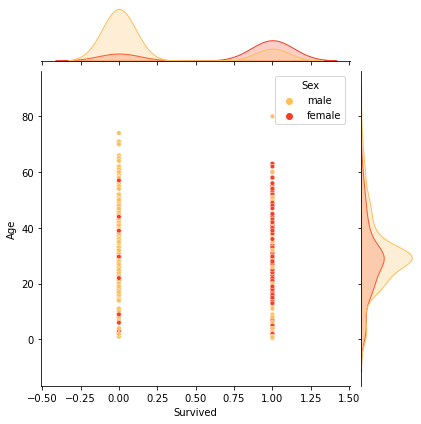

In [33]:
plt.figure(figsize=(10,15))
sns.jointplot(x="Survived",y="Age",hue="Sex",data=titanic,palette="YlOrRd",s=20)
plt.show()

1. this graph also tell us clearly that more number of males didn;t survive then as compared to women wjo not survived are very less from graph we can see this clearly and having age between (most men 20 to 30)

2. an another grapg we can see in surviavl almost maximum number are women and very less are men ( and alsio female age is between 0 to 60 and male age is between 18 to 60) as usual all young have to save the ship  

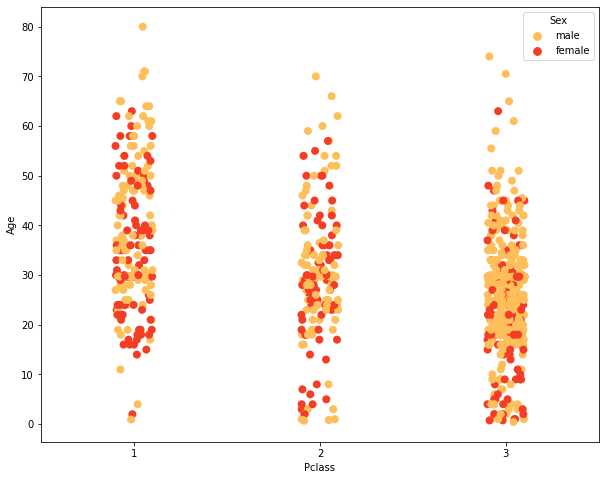

In [34]:
plt.figure(figsize=(10,8))
sns.stripplot(x="Pclass",y="Age",hue="Sex",data=titanic,palette="YlOrRd",s=8)
plt.show()

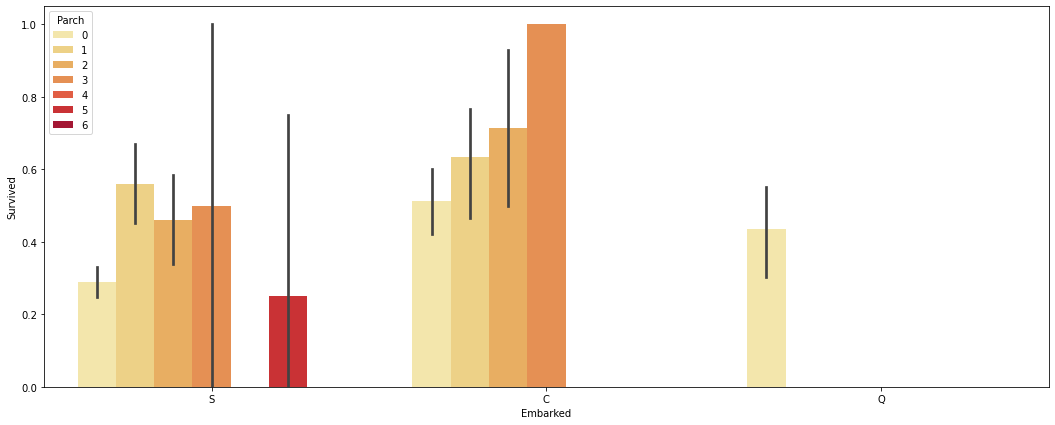

In [35]:
plt.figure(figsize=(18,7))
sns.barplot(x="Embarked",y="Survived",hue="Parch",data=titanic,palette="YlOrRd")
plt.show()

As we can se that therer sre more numbre of female in first class asn second class compoare to third class in third class there are moe number of male between the age 18 to 70 in first class and 0 to 60 to seonfd class and 0 to 75 in thord class

# NOW WE DO PREPROCESSONG 

In [36]:
# let's convert sex into binary class and embarked column also
titanic =titanic.replace({"male":1,"female":0})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [37]:
# let's drop thepassengers id 
titanic= titanic.drop(columns=["PassengerId","Ticket"],axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,C


In [38]:
corr = titanic.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


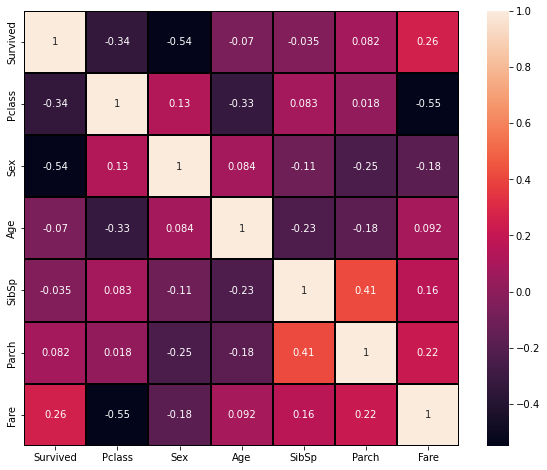

In [39]:
# let;s plot the heat map to visulaix=ze the multicollinearity begtween the cariables 
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,annot_kws={'size':10},linewidths=2,linecolor='black',square=True)
plt.show()

1. As we can see that Parch and SibSp having strong correlation between each other 
2. parch and fare also good coorelation as usual more children more fare 
3. As we can see that Survived and fare having strong correlation between ech pther in grapg alson we see that more fare was given first class and survival rate was was high 

In [40]:
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic= pd.concat([titanic, embarked_dummies], axis=1)
titanic=titanic.drop(columns="Embarked",axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,0,0,1
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,1,0,0


In [41]:
# let's drop the name column because it contain the name column 
titanic=titanic.drop(columns="Name",axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


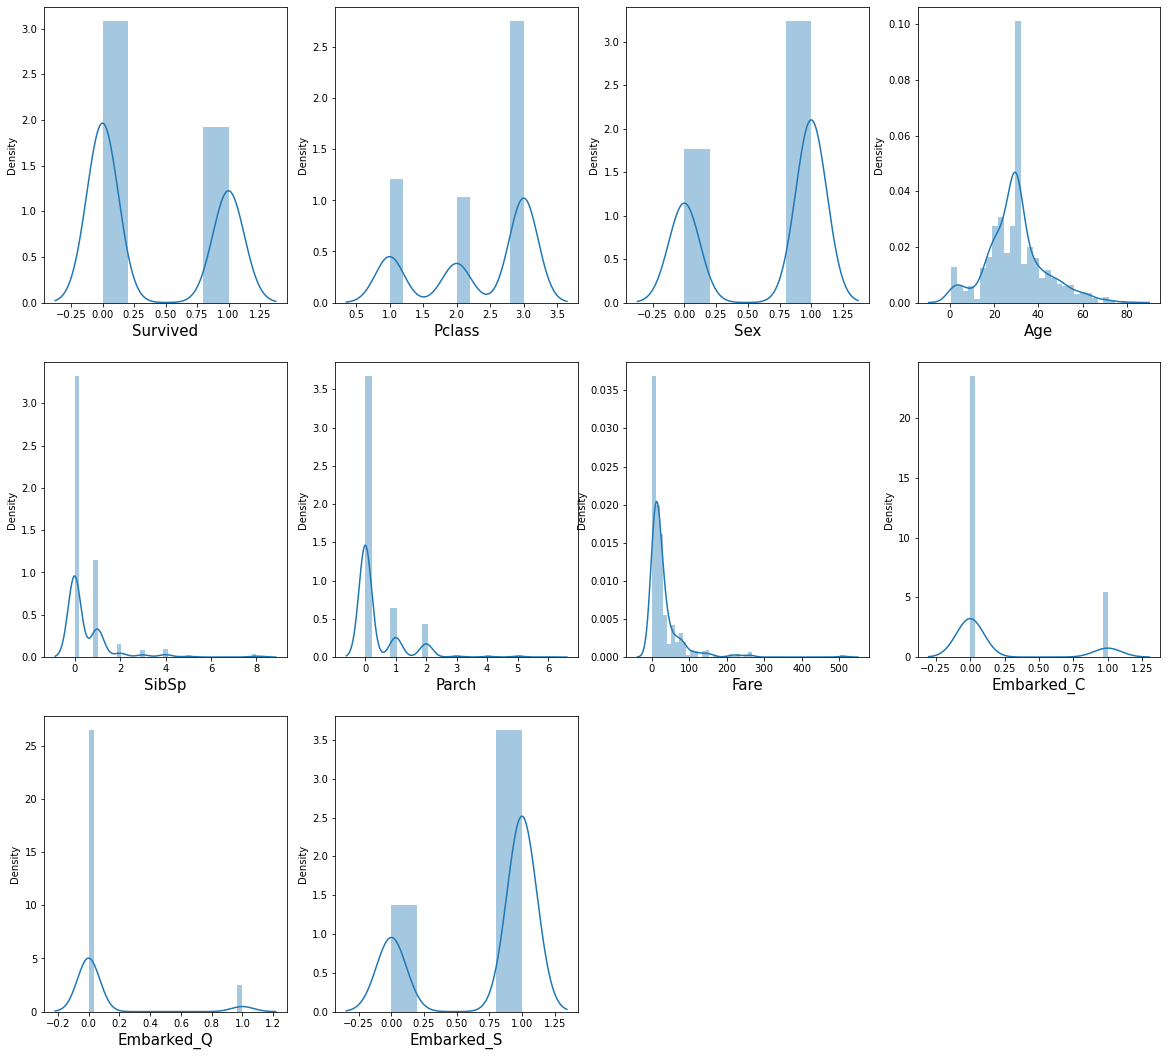

In [42]:
# now all our data is now numerical so we camplot and check skweness in our dataset 
plt.figure(figsize=(20,25))
column=1
for columns in titanic:
    if column <=10:
        plt.subplot(4,4,column)
        ax=sns.distplot(titanic[columns])
        plt.xlabel(columns,fontsize=15)
    column+=1
plt.show()

In [43]:
titanic.skew()

Survived      0.478523
Pclass       -0.630548
Sex          -0.618921
Age           0.434488
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [44]:
 # fare and sibSp  have litttile skweness let's remove it by using transform
titanic["Fare"]=np.sqrt(titanic['Fare'])

In [45]:
titanic.skew()

Survived      0.478523
Pclass       -0.630548
Sex          -0.618921
Age           0.434488
SibSp         3.695352
Parch         2.749117
Fare          2.085004
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [46]:
titanic["SibSp"]=np.sqrt(titanic['SibSp'])

In [47]:
titanic.skew()

Survived      0.478523
Pclass       -0.630548
Sex          -0.618921
Age           0.434488
SibSp         1.436526
Parch         2.749117
Fare          2.085004
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

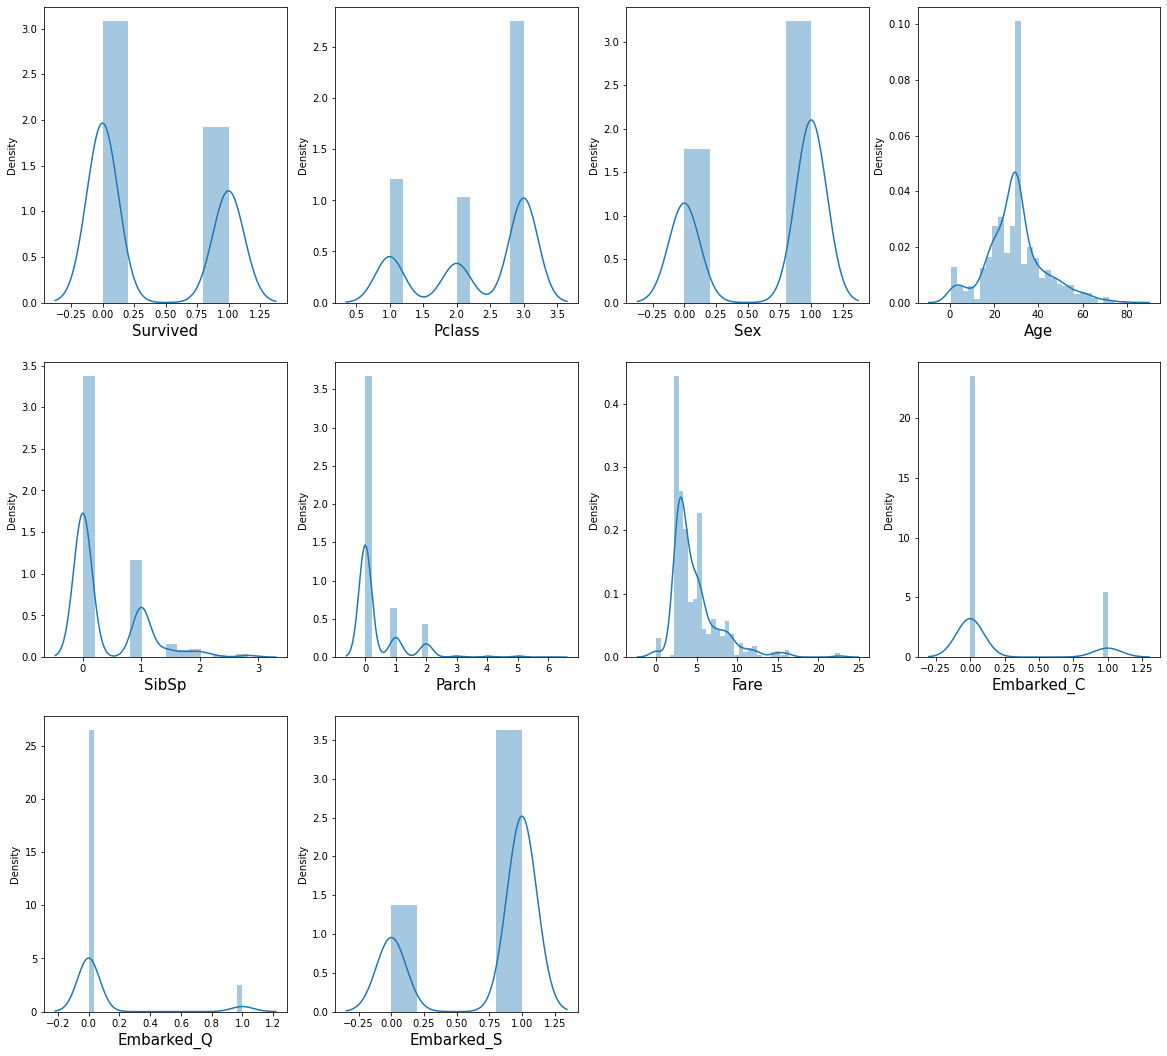

In [48]:
plt.figure(figsize=(20,25))
column=1
for columns in titanic:
    if column <=10:
        plt.subplot(4,4,column)
        ax=sns.distplot(titanic[columns])
        plt.xlabel(columns,fontsize=15)
    column+=1
plt.show()

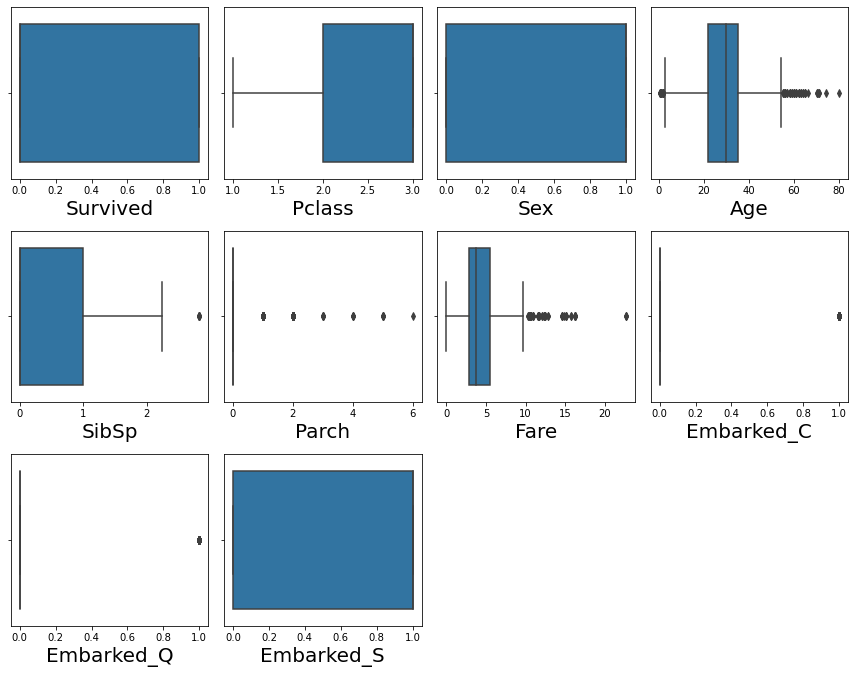

In [49]:
plt.figure(figsize=(12,12))
feature=1
for i in titanic:
    if feature <=12:
        plt.subplot(4,4,feature)
        ax=sns.boxplot(titanic[i])
        plt.xlabel(i,fontsize=20)
    feature+=1
plt.tight_layout()

In [53]:
# let's seprate our feature and variable
x=titanic.drop(columns=["Survived"])
y=titanic["Survived"]

In [56]:
# Let's check multicollinearity but before that we scaled our dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_value=scaler.fit_transform(x)
x_scaled_value

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.63878901, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.73769513, -0.2846632 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [57]:
# now lets's check VIF values to find the mullticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(x_scaled_value, i) for i in range(x_scaled_value.shape[1])]
vif_data["faeture"]=x.columns

In [58]:
print(vif_data)

        VIF     faeture
0  2.292896      Pclass
1  1.133685         Sex
2  1.213347         Age
3  1.373952       SibSp
4  1.378970       Parch
5  2.449579        Fare
6       inf  Embarked_C
7       inf  Embarked_Q
8       inf  Embarked_S


As you can see there is no multicollinearity present so we don;t need to do any tranfsormation 

# Now we build our ML model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Random Forest classifier

In [62]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        RFR = RandomForestClassifier()
        
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 93
 best_accuracy_score:-  86.59217877094973


In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=93)
RFR=RandomForestClassifier()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of random forest classifier is ")
print(conf)
print("classification_report of random forest classifier at random state is:- ")
print(clas)

confusion matrix of random forest classifier is 
[[99 14]
 [12 54]]
classification_report of random forest classifier at random state is:- 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       113
           1       0.79      0.82      0.81        66

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179



# Logistic regression

In [65]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        logistic_r= LogisticRegression()
        
        logistic_r.fit(X_train, y_train)
        y_pred = logistic_r.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 6
 best_accuracy_score:-  86.59217877094973


In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
logistic_r= LogisticRegression()
logistic_r.fit(X_train, y_train)
y_pred = logistic_r.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[106   7]
 [ 17  49]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       113
           1       0.88      0.74      0.80        66

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



# Support vector classifier

In [71]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        svc= SVC()
        
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 273
 best_accuracy_score:-  80.44692737430168


In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=273)
svc= SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[121   8]
 [ 27  23]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       129
           1       0.74      0.46      0.57        50

    accuracy                           0.80       179
   macro avg       0.78      0.70      0.72       179
weighted avg       0.80      0.80      0.79       179



# KNeighbours Classifier

In [73]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        knc=KNeighborsClassifier()
        
        knc.fit(X_train, y_train)
        y_pred = knc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 91
 best_accuracy_score:-  82.12290502793296


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)
knc=KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is KNeighborsClassifier")
print(conf)
print("classification_report of KNeighborsClassifier is:- ")
print(clas)

confusion matrix of  is KNeighborsClassifier
[[103  17]
 [ 15  44]]
classification_report of KNeighborsClassifier is:- 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       120
           1       0.72      0.75      0.73        59

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



# AdaBoostClassifier

In [76]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        adb=AdaBoostClassifier()
        
        adb.fit(X_train, y_train)
        y_pred = adb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 18
 best_accuracy_score:-  87.15083798882681


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is AdaBoostClassifier")
print(conf)
print("classification_report of AdaBoostClassifier is:- ")
print(clas)

confusion matrix of  is AdaBoostClassifier
[[97 12]
 [11 59]]
classification_report of AdaBoostClassifier is:- 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       109
           1       0.83      0.84      0.84        70

    accuracy                           0.87       179
   macro avg       0.86      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



# DescionTree Classifier

In [85]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        dtc=DecisionTreeClassifier()
        
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 4
 best_accuracy_score:-  84.91620111731844


In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[111   8]
 [ 18  42]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       119
           1       0.84      0.70      0.76        60

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



#  GradientBoostingClassifier

In [84]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
        GBC=GradientBoostingClassifier()
        
        GBC.fit(X_train, y_train)
        y_pred = GBC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 254
 best_accuracy_score:-  86.56716417910447


In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=254)
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[109  11]
 [ 14  45]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       120
           1       0.80      0.76      0.78        59

    accuracy                           0.86       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



# BaggingClassifier

In [90]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        BC=BaggingClassifier()
        
        BC.fit(X_train, y_train)
        y_pred = BC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 74
 best_accuracy_score:-  87.15083798882681


In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=74)
BC=GradientBoostingClassifier()
BC.fit(X_train, y_train)
y_pred = BC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[106   6]
 [ 13  54]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       112
           1       0.90      0.81      0.85        67

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179



# As we can see after aplying different model we find "AdaBoost Classifier" have best accuracy but still here we not finished we still don"t know that wether our data is overrfitting our score maybe thats why it giving that accuracy so to check we do croos validation 

In [98]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold()


skf_score=cross_val_score(RFR,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

81.14870378507312
[0.77653631 0.80898876 0.85393258 0.78089888 0.83707865]
0.06002134203753684


In [99]:
# now we do it from logistic regression
skf_score=cross_val_score(logistic_r,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

78.45332998556273
[0.76536313 0.79213483 0.78089888 0.76966292 0.81460674]
0.08697508003264076


In [97]:
# now we do for svc
skf_score=cross_val_score(svc,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

69.93095223149834
[0.61452514 0.74719101 0.69101124 0.71348315 0.73033708]
0.1721988575732848


In [100]:
# now we do for Kneighboursclassifier
skf_score=cross_val_score(knc,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

74.86598455840813
[0.69273743 0.75842697 0.74719101 0.80898876 0.73595506]
0.12284853430418685


In [101]:
# now we do fordesciontreeclassifer
skf_score=cross_val_score(dtc,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

77.10878162073944
[0.73184358 0.76966292 0.79775281 0.74719101 0.80898876]
0.10042056368087371


In [102]:
#now we do it for adaboostclassifier
skf_score=cross_val_score(adb,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

80.25233820852426
[0.75418994 0.79775281 0.82022472 0.81460674 0.8258427 ]
0.06898499780302547


In [103]:
#now we do it for Bagging Classifier
skf_score=cross_val_score(BC,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

81.82035026049842
[0.79888268 0.79775281 0.84269663 0.80337079 0.84831461]
0.053304877283284036


In [104]:
#now we do it for GradientBoostClassifier
skf_score=cross_val_score(GBC,x,y,cv=skf)
print((skf_score.mean())*100)
print(skf_score)
print((best_accuracy_score)-skf_score.mean())

81.93208210407383
[0.80446927 0.79775281 0.84269663 0.80337079 0.84831461]
0.0521875588475299


# From the above we can clealry see that least difference between for GradientBoosting Classifier

# Hyperparameter Tuning

In [108]:
# now we do hyperparametertunning
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100,150,200],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [3,4,5],
    'subsample': [0.8,0.9,1],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt'],
    'loss': ['deviance','exponential']
}

In [112]:
grid_searchs = GridSearchCV(estimator=GBC, param_grid=params, cv=skf)

In [113]:
grid_searchs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1]})

In [114]:
grid_searchs.best_params_

{'learning_rate': 0.3,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1}

# now we get our final best_parameters now we use to build our final model

In [124]:
best_model_titanic=GradientBoostingClassifier(learning_rate= 0.3,loss='deviance',max_depth= 3,max_features='sqrt',min_samples_leaf= 3,min_samples_split= 2,n_estimators= 100,subsample= 1)
best_model_titanic.fit(X_train,y_train)
pred=best_model_titanic.predict(X_test)
ac=accuracy_score(y_test,pred)
accurate=(ac*100)
print("accuracy of our final model is :- ")
print(accurate)

accuracy of our final model is :- 
89.3854748603352


In [125]:
conf_final_model_titanic=confusion_matrix(y_test,pred)
print("confusion matrix of our final model titanic is")
print(conf_final_model_titanic)
clas_final_model_titanic=classification_report(y_test,pred)
print("Classsification report of our final model titanic is ")
print(clas_final_model_titanic)

confusion matrix of our final model titanic is
[[105   7]
 [ 12  55]]
Classsification report of our final model titanic is 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       112
           1       0.89      0.82      0.85        67

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179



In [126]:
import pickle
project_name="titanic_survival_prediction.pkl"
pickle.dump(best_model_titanic,open(project_name,'wb'))

In [127]:
import pickle
load_final_model=pickle.load(open('titanic_survival_prediction.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

89.3854748603352


In [128]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [129]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
predicted,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
original,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


As you can clealry see that from target_variable_prediction chart that whatever we predicted and  the originally data was matching correctly almost 90% correctly so this model is very good 

# Our final model is build and score is 89% correct and almost it predict close to original datset 